Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024 |
<u>**ACTIVITY NO.7** | **Performing Face Recognition**
**Name** | DelaCruz, Gabrielle
**Section** | CPE32S3
**Date Performed**: | February 21, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

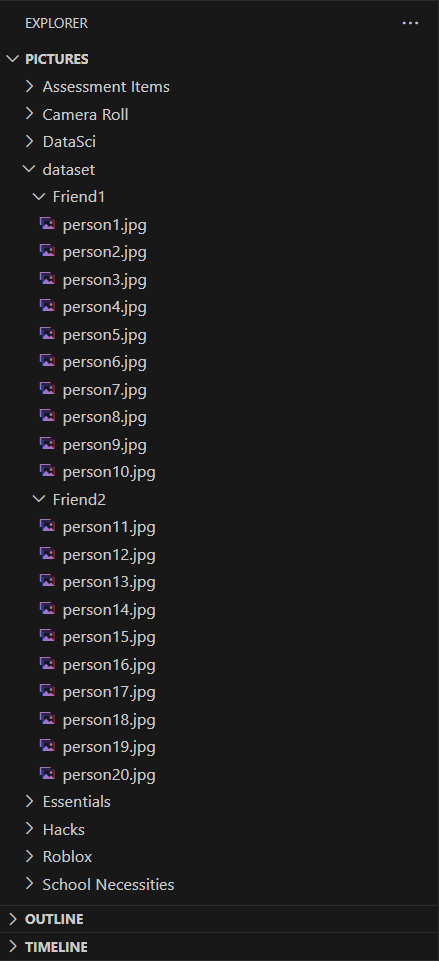

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 10.7 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.6 MB 13.3 MB/s eta 0:00:01
   --------------------------- ------------ 8.7/12.6 MB 14.5 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 14.9 MB/s eta 0:00:00


In [ ]:
%pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

The code block above contains the methods of the function read_image() that is used in further models to read the real-time imaging of a webcam. It processes the images by the application of grayscale, enabling the detection overlay with the model doing the recognition. I had faced no challenge whatsoever but only the installation of libraries prior to the execution of succeeding code cells.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
!pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)


In [ ]:
def face_rec():
    names = ['Friend1', 'Friend2']  # Put your names here for faces to recognize

    [X, y] = read_images("dataset", sz=(200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                color = (255, 0, 0)  # Default color (blue)

                if label == 'Friend2':
                    color = (0, 255, 0)  # Green color for Friend2

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

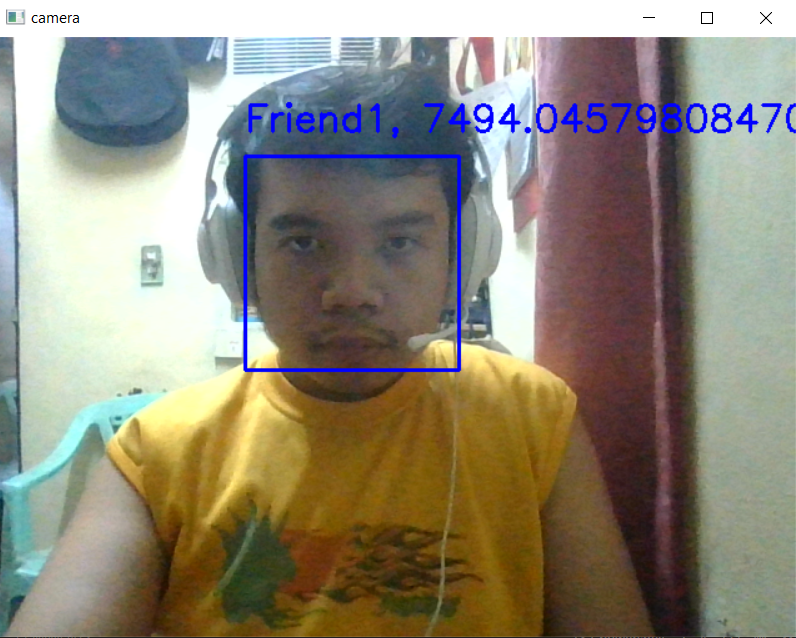

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The sample code enables the capturing of the device webcam on a separate window with the function to detect faces for two individuals inclusive on the dataset. There was a problem in the installation of OpenCV on my end but after that, a few minor changes were made in the code to make it function properly.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.FisherFaceRecognizer_create()`
- `model = cv2.face.LBPHFaceRecognizer_create()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important once this application.**

This method serves as the foundation of the face recognition model that returns a tuple containing two elements, the Label (predicted class) and Confidence (distance). These are crucial for Label identifies detected face of a person as a mapper for human-readable names, Friend1 and Friend2. The latter helps in the asssessment of prediction reliability where it can be used to set a threshold for the predicting capability of a model, providing an opportunity to better finetune the recognition of a model.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

*In addition to testing out the several methods above, a few lines of code has been added to provide a different frame for the other person.*

In [ ]:
if label == 'Friend2':
                    color = (0, 255, 0)  # Green color for Friend2

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

**Refer to the following link for the project documentation:**
https://docs.google.com/document/d/19nHH7yRQRQIMTc_mpj_IQIWn8TuqIVFQk5qi_DMG6U0/edit?usp=sharing

In this project, a dataset containing the image data of two individuals, each with a set of 10 faces in different angles, was used to perform on the three face recognition models. In this dataset, the Eigenface Recognition was observed that it optimally performs in face detection but falls short compared to Fisherface and LBPH.  Despite this, it performs better in recognition compared to LPBH. The distance to which it detects faces and sensitivity to light is similar to LPBH. The LPBH performs best in detection even in closer proximity compared to the other models but its recognition fails the most. It has been observed in Fisherface to perform the best in face recognition with a balanced detection, in offering short and long distances, paired with the ability to be less sensitive with light. Additionally, the Fisherface model is able to detect with hand gestures that may cover the face, demonstrating its better capability of detecting. Finally, it can be deduced that the Fisherface model works the best at least in this dataset, where it is able to detect and recognize most imaging scenarios.


## 5. Summary, Conclusions and Lessons Learned

This notebook serves as the amalgamation of all the previous learnings tackled from the very first scripting of image, the concepts of detections in lines, circles, countours, and edges, as well as face recognition. The knowledge has been tested by developing a project that is capable of testing three models, EigenFace, FisherFace, and LPBH as part of OpenCV. In the operation behind this projjejct, it reads images from the dataset and uses the model to recognize faces in real-time from the webcam feed. Steps include the reading and preprocessing of images inclusive of the dataset, with the training in the face recognition models, imbued by the detection of faces by the Haar Cascades classifier.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*